# Workflow testing


In [53]:
import sys
import os
import json

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    import bumps
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

from tron.bayesian_analysis import summary_plots, model_utils

In [28]:
# Data analysis directory
project_dir = os.path.expanduser('~/git/TrON/example_analysis')

# Upper-level data directory for the time-resolved data
data_dir = os.path.join(project_dir, 'data')

# Directory where we store dynamic fit results
dyn_model_dir = os.path.join(project_dir, 'dyn-fitting')

dynamic_run = 207168 # Cycle 1

dyn_fit_dir = os.path.join(dyn_model_dir, '207168-dyn/results-30s-bck')



In [29]:
from tron.bayesian_analysis import template, fitting_loop
importlib.reload(template)
importlib.reload(fitting_loop)

init_json = os.path.join(project_dir, 'dyn-fitting', '207161', '__model-expt.json') 
final_json = os.path.join(project_dir, 'dyn-fitting', '207169', '__model-expt.json')

template_str = template.create_model(init_json, final_json,True)

with open('model-loop-tmp.py', 'w') as fd:
    fd.write(template_str)

results_dir = os.path.join(project_dir, '207168-test')
#fitting_loop.execute_fit(dynamic_run, data_dir, 'model-loop-tmp.py', init_json, final_json, results_dir)


23


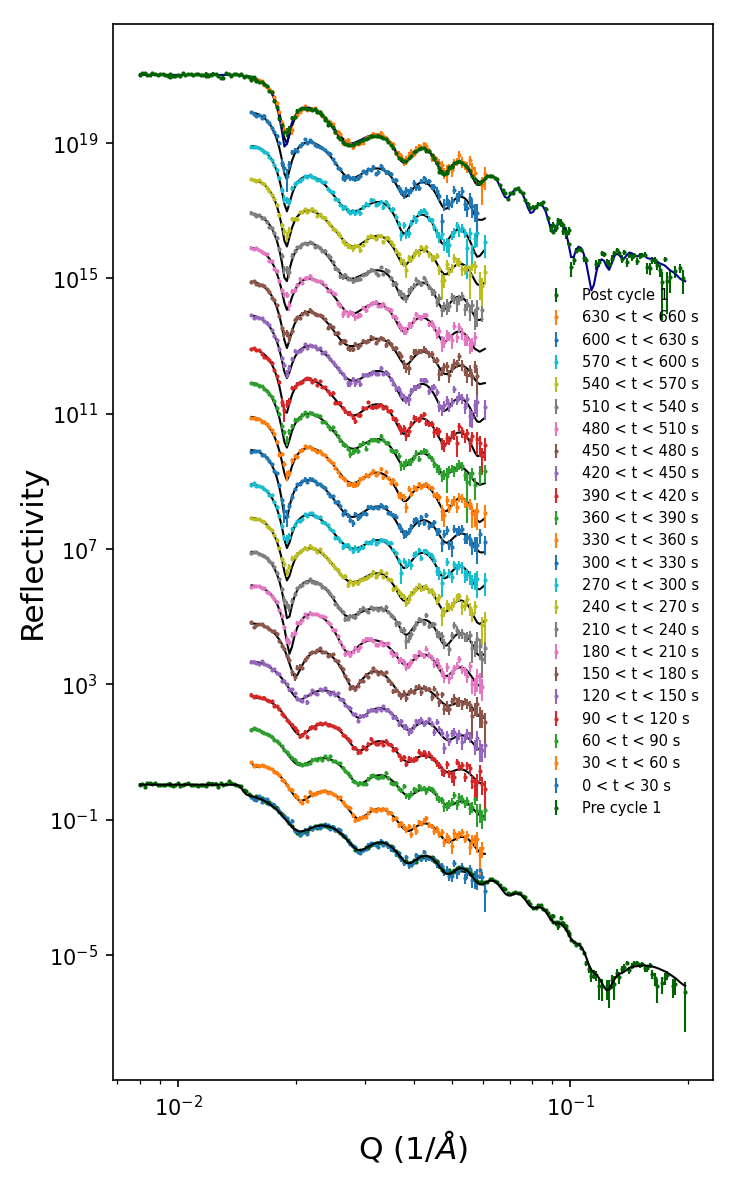

In [86]:
from tron.bayesian_analysis import summary_plots
importlib.reload(summary_plots)

initial_state = init_json.replace('expt.json', 'refl.dat')
final_state = final_json.replace('expt.json', 'refl.dat')

plotted_data = summary_plots.plot_dyn_data(dynamic_run, initial_state, final_state,
                                           dyn_data_dir=data_dir, dyn_fit_dir=results_dir,
                                           model_name='test-model', scale=1)


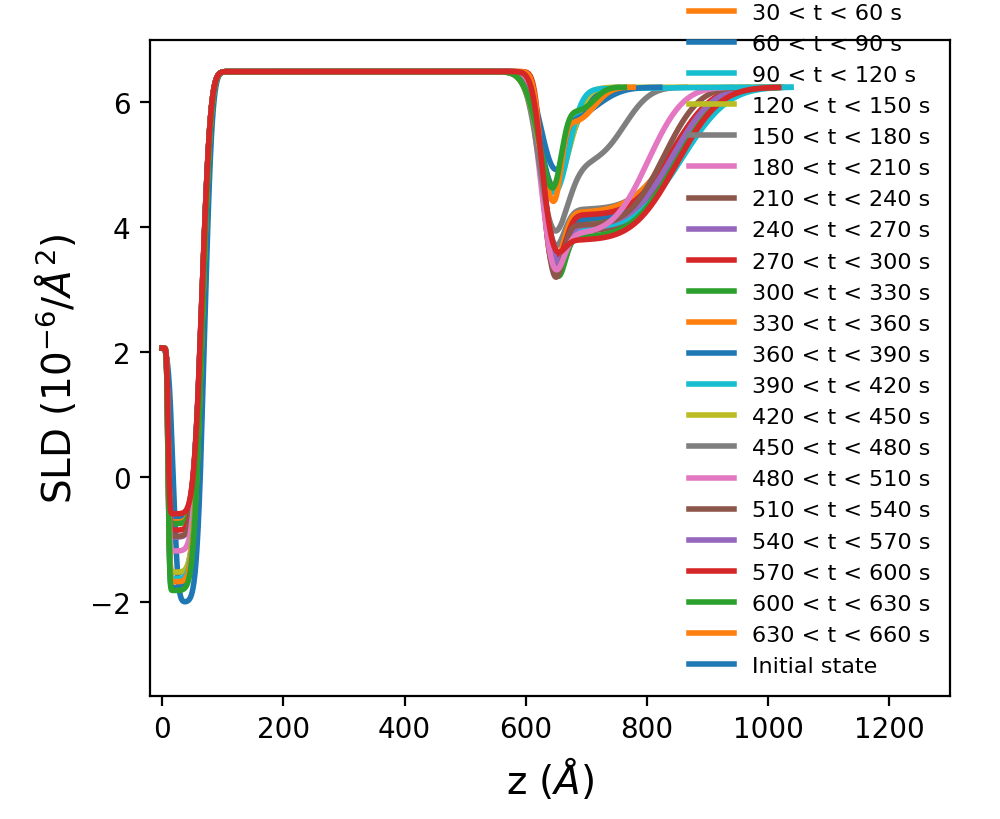

In [85]:
importlib.reload(summary_plots)
importlib.reload(model_utils)

initial_state = init_json.replace('expt.json', 'profile.dat')
final_state = final_json.replace('expt.json', 'profile.dat')

summary_plots.plot_dyn_sld(plotted_data, initial_state, final_state,
                           dyn_fit_dir=dyn_fit_dir, 
                           show_cl=False, model_name='model-loop-207168', legend_font_size=8, max_z=1300, sld_range=[-3.5, 7])
plt.savefig('dyn_sld.svg')